![](../images/chap05_2.jpg)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from modules.my_pyspark import *
from modules.my_drawer import MyDrawer
from pyspark.sql import functions as F

In [3]:
spark = MyPySpark(session=True, sql=True)
drawer = MyDrawer()

#### Task 1

In [4]:
file_path = r'../../local_data/complaints.csv'

In [5]:
data = spark.readFile(file_path)

#### Task 2

_Cho biết dữ liệu có bao nhiêu dòng_

In [6]:
data.count()

2083368

_In schema_

In [7]:
data.printSchema()

root
 |-- Date received: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Sub-product: string (nullable = true)
 |-- Issue: string (nullable = true)
 |-- Sub-issue: string (nullable = true)
 |-- Consumer complaint narrative: string (nullable = true)
 |-- Company public response: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ZIP code: string (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Consumer consent provided?: string (nullable = true)
 |-- Submitted via: string (nullable = true)
 |-- Date sent to company: string (nullable = true)
 |-- Company response to consumer: string (nullable = true)
 |-- Timely response?: string (nullable = true)
 |-- Consumer disputed?: string (nullable = true)
 |-- Complaint ID: string (nullable = true)



_Hiển thị 3 dòng đầu tiên_

In [8]:
for row in data.head(3):
    print(row)
    print()

Row(Date received='2019-09-24', Product='Debt collection', Sub-product='I do not know', Issue='Attempts to collect debt not owed', Sub-issue='Debt is not yours', Consumer complaint narrative='transworld systems inc. ', Company public response=None, Company=None, State=None, ZIP code=None, Tags=None, Consumer consent provided?=None, Submitted via=None, Date sent to company=None, Company response to consumer=None, Timely response?=None, Consumer disputed?=None, Complaint ID=None)

Row(Date received='is trying to collect a debt that is not mine', Product=' not owed and is inaccurate."', Sub-product=None, Issue='TRANSWORLD SYSTEMS INC', Sub-issue='FL', Consumer complaint narrative='335XX', Company public response=None, Company='Consent provided', State='Web', ZIP code='2019-09-24', Tags='Closed with explanation', Consumer consent provided?='Yes', Submitted via='N/A', Date sent to company='3384392', Company response to consumer=None, Timely response?=None, Consumer disputed?=None, Complaint

#### Task 3

_Kiểm tra NaN value_

In [9]:
checkNaNValues(data)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> * Ko có nan values

In [10]:
checkNullValues(data)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,40,209258,511176,325183,931248,1454171,1412034,573431,597994,673059,1720420,600884,583444,659690,694041,711651,721662,728036


* Có nh dữ liệu null

#### Task 4

_Kiểm tra có duplicate ko_

In [11]:
data.distinct().count()

2020609

> * Có dữ liệu duplicate

In [12]:
data = data.drop_duplicates()

In [13]:
data.count()

2020609

#### Task 5

In [14]:
null_data = checkNullValues(data)

In [15]:
null_data = null_data.T

In [16]:
null_data

,0
Date received,39
Product,178373
Sub-product,472168
Issue,281416
Sub-issue,884470
Consumer complaint narrative,1405173
Company public response,1353196
Company,513337
State,537111
ZIP code,611785


_Tính phần trăm_

In [17]:
null_data['percentage'] = null_data[0]/data.count()

In [18]:
null_data

,0,percentage
Date received,39,0.000019
Product,178373,0.088277
Sub-product,472168,0.233676
Issue,281416,0.139273
Sub-issue,884470,0.437724
Consumer complaint narrative,1405173,0.695421
Company public response,1353196,0.669697
Company,513337,0.254051
State,537111,0.265816
ZIP code,611785,0.302773


#### Task 6

In [19]:
features = [
    'Date received',
    'Product',
    'Sub-product',
    'Issue',
    'Company',
    'State',
    'Consumer consent provided?',
    'Submitted via'
]

In [20]:
data_sub = data.select(features)

#### Task 7

In [21]:
data_sub = data_sub.dropna(how='any', subset=['Date received', 'Product'])

In [22]:
checkNullValues(data_sub)

,Date received,Product,Sub-product,Issue,Company,State,Consumer consent provided?,Submitted via
0,0,0,332225,141159,373348,397120,399331,381799


#### Task 8

In [23]:
data_sub = data_sub.withColumn('date_from_text', F.regexp_extract(data_sub['Date received'], r"(\d{4}-\d{1,2}-\d{1,2})", 0))

In [24]:
data_sub = data_sub.filter(data_sub['date_from_text'] != '')

In [25]:
data_sub.select('date_from_text', 'Date received').head(10)

[Row(date_from_text='2019-09-19', Date received='2019-09-19'),
 Row(date_from_text='2019-04-04', Date received='2019-04-04'),
 Row(date_from_text='2019-02-18', Date received='2019-02-18'),
 Row(date_from_text='2019-05-25', Date received='2019-05-25'),
 Row(date_from_text='2019-03-28', Date received='2019-03-28'),
 Row(date_from_text='2018-12-28', Date received='2018-12-28'),
 Row(date_from_text='2019-08-08', Date received='2019-08-08'),
 Row(date_from_text='2019-04-04', Date received='2019-04-04'),
 Row(date_from_text='2019-04-22', Date received='2019-04-22'),
 Row(date_from_text='2019-03-27', Date received='2019-03-27')]

#### Task 9

In [26]:
data_sub = data_sub.withColumn('CCP', data_sub['Consumer consent provided?'])

In [27]:
data_sub = data_sub.fillna('Consent not provided', subset='CCP')

#### Task 10

In [28]:
data_sub = data_sub.withColumn('SV', data_sub['Submitted via'])

In [29]:
data_sub = data_sub.fillna('Other', subset='SV')

#### Task 11

In [30]:
data_sub = data_sub.withColumn('Sub-pr', data_sub['Sub-product'])

In [31]:
data_sub = data_sub.fillna('I do not know', subset='Sub-pr')

#### Task 12

In [32]:
data_sub = data_sub.withColumn('State_new', when(col('State').isNull(), 'unknown').otherwise(col('State')))

#### Task 13

In [33]:
from datetime import datetime
from pyspark.sql import types

In [34]:
func = udf(lambda x: datetime.strptime(x, '%Y-%m-%d'), types.DateType())

NameError: name 'udf' is not defined

In [43]:
data_sub = data_sub.withColumn('Date_received', func(col('date_from_text')))

In [44]:
data_sub.printSchema()

root
 |-- Date received: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Sub-product: string (nullable = true)
 |-- Issue: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Consumer consent provided?: string (nullable = true)
 |-- Submitted via: string (nullable = true)
 |-- date_from_text: string (nullable = true)
 |-- CCP: string (nullable = false)
 |-- SV: string (nullable = false)
 |-- Sub-pr: string (nullable = false)
 |-- State_new: string (nullable = true)
 |-- Date_received: date (nullable = true)



#### Task 14

In [45]:
data_sub = data_sub.withColumn('Day_of_week', dayofweek('Date_received'))

#### Task 15

In [46]:
data_sub = data_sub.withColumn('year', year('Date_received')).withColumn('month', month('Date_received'))

In [48]:
data_sub.select('Date_received', 'Day_of_week', 'month', 'year').show()

+-------------+-----------+-----+----+
|Date_received|Day_of_week|month|year|
+-------------+-----------+-----+----+
|   2019-09-19|          5|    9|2019|
|   2019-04-04|          5|    4|2019|
|   2019-02-18|          2|    2|2019|
|   2019-05-25|          7|    5|2019|
|   2019-03-28|          5|    3|2019|
|   2018-12-28|          6|   12|2018|
|   2019-08-08|          5|    8|2019|
|   2019-04-04|          5|    4|2019|
|   2019-04-22|          2|    4|2019|
|   2019-03-27|          4|    3|2019|
|   2019-04-26|          6|    4|2019|
|   2019-04-16|          3|    4|2019|
|   2019-06-04|          3|    6|2019|
|   2019-01-01|          3|    1|2019|
|   2019-06-21|          6|    6|2019|
|   2018-12-22|          7|   12|2018|
|   2019-01-12|          7|    1|2019|
|   2019-10-28|          2|   10|2019|
|   2019-03-13|          4|    3|2019|
|   2019-04-11|          5|    4|2019|
+-------------+-----------+-----+----+
only showing top 20 rows



#### Task 16

array([[<AxesSubplot:title={'center':'Day_of_week'}>]], dtype=object)

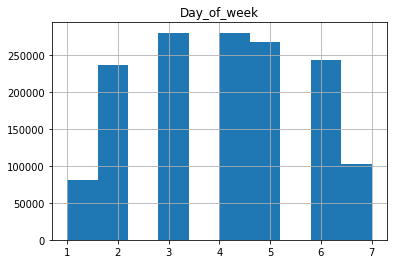

In [49]:
data_sub.select('Day_of_week').toPandas().hist()

> * Khách hàng complain nhiều nhất từ thứ 2 đến thứ 6, thứ 7 + CN chắc do đi chơi nên ko lướt mua sắm nhiều

#### Task 17

In [50]:
df_products = data_sub.groupBy('product').count().orderBy('count', ascending=False).toPandas()

In [52]:
df_products.head(20)

,product,count
0,"Credit reporting, credit repair services, or o...",331635
1,Mortgage,295097
2,Debt collection,278961
3,Credit reporting,139825
4,Credit card,89175
5,Bank account or service,86193
6,Credit card or prepaid card,67849
7,Checking or savings account,57461
8,Student loan,56365
9,Consumer Loan,31592


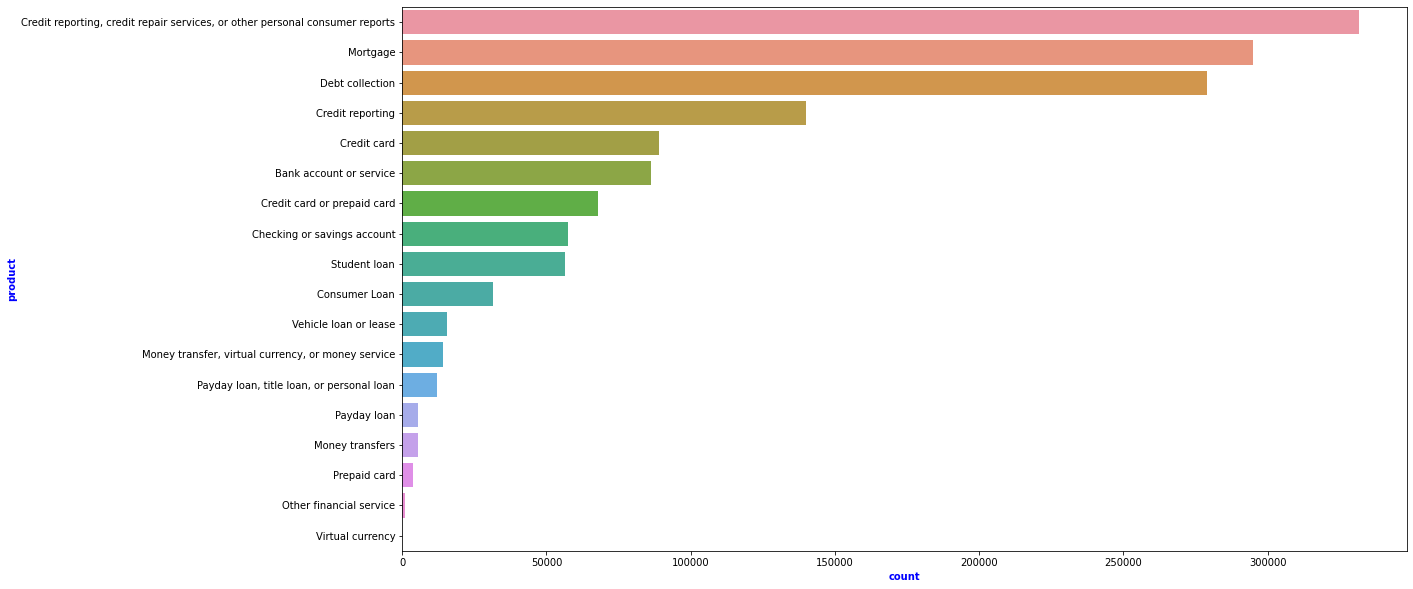

In [56]:
drawer.horbar(df_products, 'count', 'product', figsize=(18, 10))